# Q: How do the attack stats of Generation 1 Pokemon compare to Generation 9 Pokemon?

I plan to conduct an observational study using a census of all Pokemon from generation 9 and gen 1 using data collected on all of the Pokemon from each generation and their stats.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


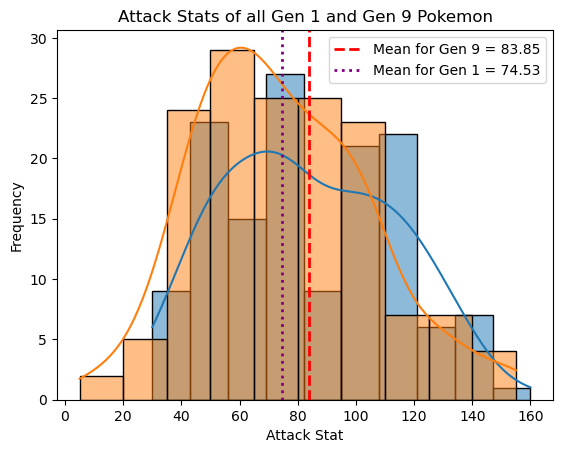

In [2]:
df9 = pd.read_csv("Gen9Mons.csv")
df1 = pd.read_csv("Gen1Mons.csv")

sns.histplot(df9["Attack"], bins=10, kde=True)
sns.histplot(df1["Attack"], bins=10, kde=True)


# Mean and std
mean_val9 = df9["Attack"].mean()
mean_val1 = df1["Attack"].mean()

# Add lines
plt.axvline(mean_val9, color='red', linestyle='--', linewidth=2, label=f"Mean for Gen 9 = {mean_val9:.2f}")
plt.axvline(mean_val1, color='purple', linestyle=':', linewidth=2, label=f"Mean for Gen 1 = {mean_val1:.2f}")

plt.xlabel("Attack Stat")
plt.ylabel("Frequency")
plt.title("Attack Stats of all Gen 1 and Gen 9 Pokemon")
plt.legend()
plt.show()

In [3]:
std_val1 = df1["Attack"].std()
print("Standard Deviation of Gen 1:", std_val1)
df1["Attack"].describe()

Standard Deviation of Gen 1: 29.863647454616096


count    151.000000
mean      74.529801
std       29.863647
min        5.000000
25%       51.000000
50%       70.000000
75%       95.000000
max      155.000000
Name: Attack, dtype: float64

In [4]:
std_val9 = df9["Attack"].std()
print("Standard Deviation of Gen 9:", std_val9)
df9["Attack"].describe()

Standard Deviation of Gen 9: 29.702100063824403


count    140.0000
mean      83.8500
std       29.7021
min       30.0000
25%       60.0000
50%       80.0000
75%      108.5000
max      160.0000
Name: Attack, dtype: float64

df1 head:
        name  pokedex_number                                     abilities  \
0       Onix              95         ['Rock Head', 'Sturdy', 'Weak Armor']   
1   Gyarados             130                       ['Intimidate', 'Moxie']   
2  Dragonair             148                 ['Shed Skin', 'Marvel Scale']   
3      Arbok              24        ['Intimidate', 'Shed Skin', 'Unnerve']   
4     Lapras             131  ['Water Absorb', 'Shell Armor', 'Hydration']   

   Attack  capture_rate       classfication  defense  height_m   hp  \
0      45            45  Rock Snake Pokémon      160       8.8   35   
1     155            45   Atrocious Pokémon      109       6.5   95   
2      84            45      Dragon Pokémon       65       4.0   61   
3      95            90       Cobra Pokémon       69       3.5   60   
4      85            45   Transport Pokémon       80       2.5  130   

   sp_attack  sp_defense  speed   type1   type2  weight_kg  generation  \
0         30        

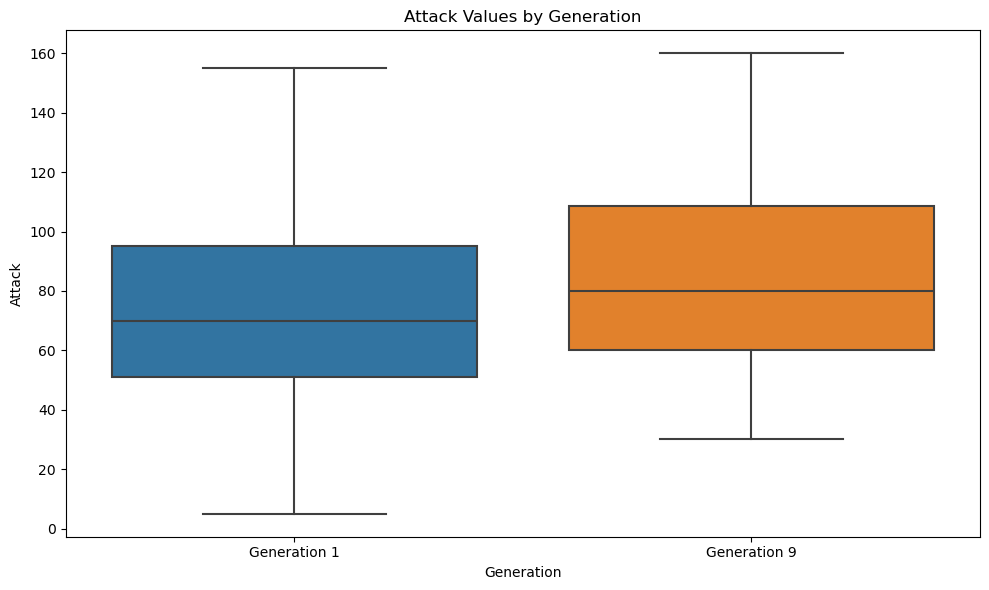

In [6]:
# First, let's check the original dataframes
print("df1 head:")
print(df1.head())
print("\ndf9 head:")
print(df9.head())

# Make sure df1 exists and has an Attack column
if 'Attack' not in df1.columns:
    print("Error: 'Attack' column not found in df1")
else:
    # Create DataFrames with both Attack values and Generation information
    dfA1 = pd.DataFrame({'Attack': df1["Attack"], 'Generation': 'Generation 1'})
    dfA9 = pd.DataFrame({'Attack': df9["Attack"], 'Generation': 'Generation 9'})
    
    # Check individual dataframes before concatenation
    print("\ndfA1 shape:", dfA1.shape)
    print("dfA1 head:")
    print(dfA1.head())
    
    print("\ndfA9 shape:", dfA9.shape)
    print("dfA9 head:")
    print(dfA9.head())
    
    # Combine the DataFrames
    df_combined = pd.concat([dfA1, dfA9], ignore_index=True)
    
    # Convert the Attack column to numeric type
    df_combined['Attack'] = pd.to_numeric(df_combined['Attack'], errors='coerce')
    
    # Check for NaN values
    print("\nNaN values in Attack column:", df_combined['Attack'].isna().sum())
    
    # Drop any rows with NaN values
    df_combined = df_combined.dropna()
    
    # Check the combined data
    print("\nCombined data shape after cleaning:", df_combined.shape)
    print("Generation counts:")
    print(df_combined['Generation'].value_counts())
    
    # Make new boxplot with combined dataframe
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_combined, x='Generation', y='Attack')
    plt.title('Attack Values by Generation')
    plt.tight_layout()
    plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


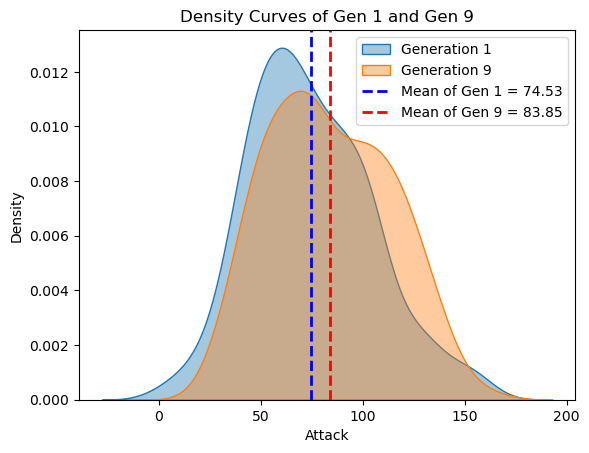

In [15]:
# KDE plot for both datasets
sns.kdeplot(df1["Attack"], label="Generation 1", fill=True, alpha=0.4)
sns.kdeplot(df9["Attack"], label="Generation 9", fill=True, alpha=0.4)

# Calculate stats
mean1 = df1["Attack"].mean()
mean2 = df9["Attack"].mean()

# Add mean & median lines
plt.axvline(mean1, color="blue", linestyle="--", linewidth=2, label=f"Mean of Gen 1 = {mean1:.2f}")

plt.axvline(mean2, color="red", linestyle="--", linewidth=2, label=f"Mean of Gen 9 = {mean2:.2f}")

plt.xlabel("Attack")
plt.ylabel("Density")
plt.title("Density Curves of Gen 1 and Gen 9")
plt.legend()
plt.show()

In [14]:
# Calculate some common percentiles (25th, 50th, 75th)
percentiles1 = df1["Attack"].quantile([0.25, 0.5, 0.75])
percentiles9 = df9["Attack"].quantile([0.25, 0.5, 0.75])

print("Generation 1 percentiles:\n", percentiles1)
print("\nGeneration 9 percentiles:\n", percentiles9)

Generation 1 percentiles:
 0.25    51.0
0.50    70.0
0.75    95.0
Name: Attack, dtype: float64

Generation 9 percentiles:
 0.25     60.0
0.50     80.0
0.75    108.5
Name: Attack, dtype: float64


# Conclusion:
In conclusion, the attack stats of Generation 9 is higher on average than those of Generation 1, with the mean of gen 1 being 74.529801, and the mean of gen 9 being 83.8500. The attack stats of gen 9 are also more varied, with gen 1 having a iqr of 44 and gen 9 having a iqr of 48.5.